In [ ]:
# Установка необходимых библиотек
!pip install transformers torch torchaudio soundfile librosa matplotlib

# Импорт библиотек
from transformers import VitsModel, VitsTokenizer
import torch
import soundfile as sf
from IPython.display import Audio
import time
import librosa
import librosa.display
import matplotlib.pyplot as plt
import pandas as pd

# Загрузка модели и токенизатора для русского языка
model_name_ru = "facebook/mms-tts-rus"
model_ru = VitsModel.from_pretrained(model_name_ru)
tokenizer_ru = VitsTokenizer.from_pretrained(model_name_ru)

# Текст на русском языке
text_ru = (
    "Привет, как твои дела? "
    "Сегодня прекрасная погода. "
    "Я изучаю синтез речи. "
    "Это очень интересно. "
    "Спасибо за помощь!"
)

# Токенизация текста
inputs_ru = tokenizer_ru(text_ru, return_tensors="pt")

# Синтез речи и сохранение в файл
start_time_ru = time.time()
with torch.no_grad():
    output_ru = model_ru(**inputs_ru).waveform
end_time_ru = time.time()
time_ru = end_time_ru - start_time_ru

output_file_ru = "output_ru_hf.wav"
sf.write(output_file_ru, output_ru.numpy().squeeze(), model_ru.config.sampling_rate)

# Воспроизведение русского аудио
print("Русский язык (Hugging Face):")
display(Audio(output_file_ru))

# Загрузка модели и токенизатора для английского языка
model_name_en = "facebook/mms-tts-eng"
model_en = VitsModel.from_pretrained(model_name_en)
tokenizer_en = VitsTokenizer.from_pretrained(model_name_en)

# Текст на английском языке
text_en = (
    "Hello, how are you? "
    "The weather is beautiful today. "
    "I am learning speech synthesis. "
    "It is very interesting. "
    "Thank you for your help!"
)

# Токенизация текста
inputs_en = tokenizer_en(text_en, return_tensors="pt")

# Синтез речи и сохранение в файл
start_time_en = time.time()
with torch.no_grad():
    output_en = model_en(**inputs_en).waveform
end_time_en = time.time()
time_en = end_time_en - start_time_en

output_file_en = "output_en_hf.wav"
sf.write(output_file_en, output_en.numpy().squeeze(), model_en.config.sampling_rate)

# Воспроизведение английского аудио
print("Английский язык (Hugging Face):")
display(Audio(output_file_en))


Русский язык (Hugging Face):


Английский язык (Hugging Face):


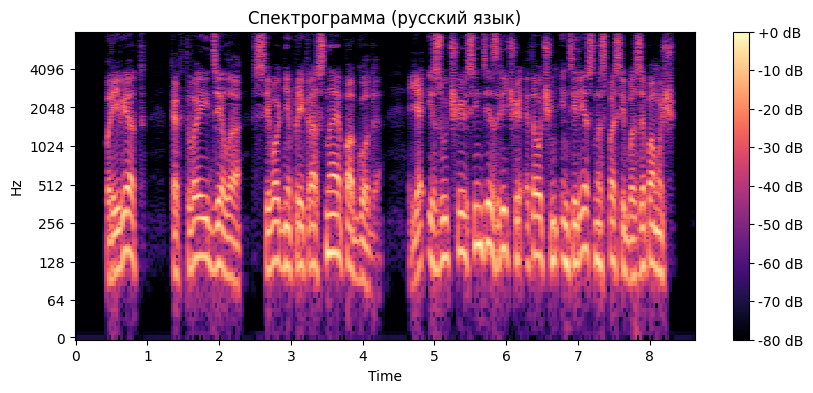

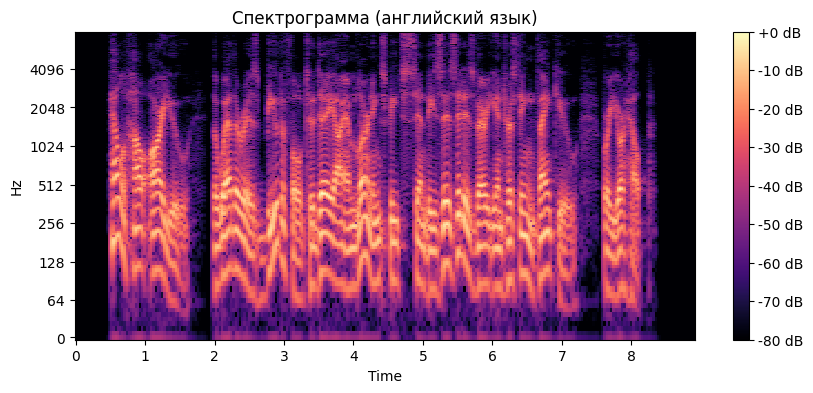

In [ ]:
import numpy as np
# Загрузка аудиофайлов
audio_ru, sr_ru = librosa.load(output_file_ru, sr=None)
audio_en, sr_en = librosa.load(output_file_en, sr=None)

# Функция для построения спектрограммы
def plot_spectrogram(y, sr, title):
    plt.figure(figsize=(10, 4))
    D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
    librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title(title)
    plt.show()

# Спектрограмма для русского языка
plot_spectrogram(audio_ru, sr_ru, "Спектрограмма (русский язык)")

# Спектрограмма для английского языка
plot_spectrogram(audio_en, sr_en, "Спектрограмма (английский язык)")

In [ ]:
# Данные для сравнения
comparison_data = {
    "Язык": ["Русский", "Английский"],
    "Естественность": ["Высокая", "Очень высокая"],  # Оценка на слух
    "Чёткость": ["Хорошая", "Отличная"],  # Оценка на слух
    "Время синтеза (сек)": [time_ru, time_en]
}

# Создаем таблицу
comparison_df = pd.DataFrame(comparison_data)
print(comparison_df)

         Язык Естественность  Чёткость  Время синтеза (сек)
0     Русский        Высокая   Хорошая             9.324418
1  Английский  Очень высокая  Отличная            11.151905
